In [175]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

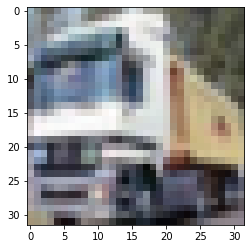

In [176]:
plt.imshow(X_train[1], plt.cm.binary)

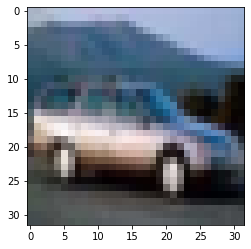

In [177]:
plt.imshow(X_train[4], plt.cm.binary)

In [178]:
print(y_train[1])
print(y_train[4])

[9]
[1]


In [179]:
car_truck_train = np.where((y_train == 1) | (y_train == 9))[0]
car_truck_test = np.where((y_test == 1) | (y_test == 9))[0]

Xtrain = X_train[car_truck_train]
ytrain = y_train[car_truck_train]

Xtest = X_test[car_truck_test]
ytest = y_test[car_truck_test]

ytrain[ytrain == 1] = False
ytrain[ytrain == 9] = True

ytest[ytest == 1] = False
ytest[ytest == 9] = True

Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size=.5, stratify=ytrain, random_state=1)

print(Xtrain.shape, Xvalid.shape, Xtest.shape, ytrain.shape, yvalid.shape, ytest.shape)
print(ytest)

(5000, 32, 32, 3) (5000, 32, 32, 3) (2000, 32, 32, 3) (5000, 1) (5000, 1) (2000, 1)
[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [180]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3,3), activation='relu',
                 padding='same', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(4, 4), strides=4))
model1.add(Flatten())
model1.add(Dense(2, activation='softmax'))

In [181]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model1.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model1.evaluate(Xtest, ytest)

Epoch 1/10
  1/250 [..............................] - ETA: 43s - loss: 25.2997 - accuracy: 0.5000

C:\Users\gragg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


250/250 [==============================] - 1s 4ms/step - loss: 5.5727 - accuracy: 0.6222 - val_loss: 2.6185 - val_accuracy: 0.6796
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 2.0458 - accuracy: 0.6924 - val_loss: 2.3647 - val_accuracy: 0.6566
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 1.3938 - accuracy: 0.7198 - val_loss: 1.2629 - val_accuracy: 0.6964
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.9024 - accuracy: 0.7210 - val_loss: 1.0373 - val_accuracy: 0.6708
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.7059 - accuracy: 0.7278 - val_loss: 0.7796 - val_accuracy: 0.6976
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7420 - val_loss: 0.7906 - val_accuracy: 0.6766
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.7388 - val_loss: 0.6939 - val_accuracy: 0.7118
Epoch 8/10
250/25

[0.6322322487831116, 0.737500011920929]

In [182]:
preds = model1.predict(Xtest, verbose=0)
testpreds = []
length = np.arange(0,2000)
preds[0,0]
for x in length:
    if preds[x,0] > preds[x,1]:
        testpreds.append(False)
    else:
        testpreds.append(True)

print("Recall:",recall_score(ytest,testpreds))
print("Precision:", precision_score(ytest,testpreds))

Recall: 0.775
Precision: 0.7209302325581395


In [183]:
model11 = Sequential()
model11.add(Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1,1), kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model11.add(MaxPooling2D(pool_size=(6, 6), strides=2))
model11.add(Flatten())
model11.add(Dense(40, activation='softmax'))

model11.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model11.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model11.evaluate(Xtest, ytest)

Epoch 1/10
  1/250 [..............................] - ETA: 49s - loss: 134.0239 - accuracy: 0.0000e+00

C:\Users\gragg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


250/250 [==============================] - 3s 11ms/step - loss: 6.4529 - accuracy: 0.6538 - val_loss: 0.9921 - val_accuracy: 0.7190
Epoch 2/10
250/250 [==============================] - 3s 11ms/step - loss: 0.8390 - accuracy: 0.7422 - val_loss: 0.8567 - val_accuracy: 0.6954
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 0.6833 - accuracy: 0.7670 - val_loss: 0.7248 - val_accuracy: 0.7364
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5925 - accuracy: 0.7938 - val_loss: 0.7692 - val_accuracy: 0.7398
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5673 - accuracy: 0.8084 - val_loss: 0.7711 - val_accuracy: 0.7490
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5511 - accuracy: 0.8166 - val_loss: 0.7914 - val_accuracy: 0.7404
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5333 - accuracy: 0.8238 - val_loss: 0.9536 - val_accuracy: 0.7324
Epoch 8/10

[0.7612107992172241, 0.7570000290870667]

In [184]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(2))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

batch_size = [50,60,70,80,90,100,110,120,130,140,150]
accuracy = []
for x in batch_size:
    history = model.fit(Xtrain, ytrain, epochs=100, batch_size=x,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
    accuracy.append(model.evaluate(Xtest, ytest)[1])

Epoch 1/100
100/100 [==============================] - 4s 37ms/step - loss: 2.0244 - accuracy: 0.5730 - val_loss: 0.7620 - val_accuracy: 0.6392
Epoch 2/100
100/100 [==============================] - 4s 37ms/step - loss: 0.7565 - accuracy: 0.6440 - val_loss: 0.7380 - val_accuracy: 0.6672
Epoch 3/100
100/100 [==============================] - 4s 36ms/step - loss: 0.7254 - accuracy: 0.6718 - val_loss: 0.6863 - val_accuracy: 0.7006
Epoch 4/100
100/100 [==============================] - 4s 37ms/step - loss: 0.6753 - accuracy: 0.7214 - val_loss: 0.6681 - val_accuracy: 0.7212
Epoch 5/100
100/100 [==============================] - 4s 36ms/step - loss: 0.6279 - accuracy: 0.7446 - val_loss: 0.6309 - val_accuracy: 0.7356
Epoch 6/100
100/100 [==============================] - 4s 37ms/step - loss: 0.5745 - accuracy: 0.7852 - val_loss: 0.5577 - val_accuracy: 0.7962
Epoch 7/100
100/100 [==============================] - 4s 36ms/step - loss: 0.5545 - accuracy: 0.7986 - val_loss: 0.5473 - val_accuracy:

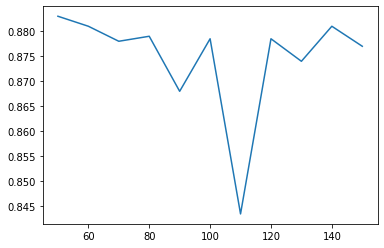

In [185]:
graph = pd.DataFrame({'batch_size':batch_size,'accuracy':accuracy})
plt.plot(graph['batch_size'],graph['accuracy'])

In [186]:
best_batch = graph['batch_size'].loc[graph['accuracy'] == max(graph['accuracy'])]
best_batch

0    50
Name: batch_size, dtype: int64

In [187]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(2))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=120,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
model.evaluate(Xtest, ytest)

Epoch 1/100
42/42 [==============================] - 4s 80ms/step - loss: 2.3603 - accuracy: 0.5586 - val_loss: 0.7749 - val_accuracy: 0.6394
Epoch 2/100
42/42 [==============================] - 3s 76ms/step - loss: 0.7561 - accuracy: 0.6512 - val_loss: 0.6995 - val_accuracy: 0.7120
Epoch 3/100
42/42 [==============================] - 3s 77ms/step - loss: 0.7040 - accuracy: 0.6898 - val_loss: 0.6690 - val_accuracy: 0.7406
Epoch 4/100
42/42 [==============================] - 3s 75ms/step - loss: 0.6424 - accuracy: 0.7430 - val_loss: 0.6209 - val_accuracy: 0.7516
Epoch 5/100
42/42 [==============================] - 3s 78ms/step - loss: 0.6025 - accuracy: 0.7708 - val_loss: 0.5651 - val_accuracy: 0.7968
Epoch 6/100
42/42 [==============================] - 3s 77ms/step - loss: 0.5651 - accuracy: 0.8008 - val_loss: 0.5252 - val_accuracy: 0.8140
Epoch 7/100
42/42 [==============================] - 3s 76ms/step - loss: 0.5130 - accuracy: 0.8172 - val_loss: 0.5177 - val_accuracy: 0.8168
Epoch 

[0.49871525168418884, 0.8865000009536743]

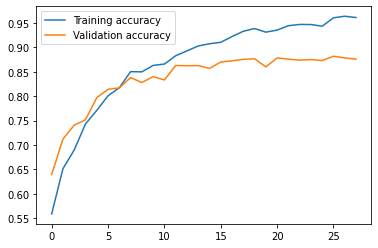

In [188]:
plt.plot(history.history['accuracy'], label='Training accuracy')

plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [189]:
preds = model.predict(Xtest, verbose=0)
testpreds = []
length = np.arange(0,2000)
preds[0,0]
for x in length:
    if preds[x,0] > preds[x,1]:
        testpreds.append(False)
    else:
        testpreds.append(True)

print("Recall:",recall_score(ytest,testpreds))
print("Precision:", precision_score(ytest,testpreds))

Recall: 0.903
Precision: 0.8741529525653436
